In [1]:
from sklearn.datasets import make_classification

#### 🔹 What problem does SMOTE solve?

#### In real-world datasets (like fraud detection, medical diagnosis, churn prediction), we often have imbalanced data:

Majority class (many samples) → e.g., “No disease”

Minority class (very few samples) → e.g., “Has disease”

👉 Machine learning models trained on imbalanced data tend to ignore the minority class, because predicting the majority all the time gives high accuracy but poor real-world performance.

In [4]:
make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1, 
                    weights=[0.90], random_state=12)

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [10]:
from sklearn.datasets import make_classification
import pandas as pd

# Step 1: Generate the dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2,
    random_state=42
)

# Step 2: Convert to DataFrames
df = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

# Step 3: Combine into one final DataFrame
final_df = pd.concat([df, df2], axis=1)

print(final_df.head())


         f1        f2  target
0  0.601034  1.535353       1
1  0.755945 -1.172352       0
2  1.354479 -0.948528       0
3  3.103090  0.233485       0
4  0.753178  0.787514       1


In [11]:
final_df['target'].value_counts()


target
0    501
1    499
Name: count, dtype: int64

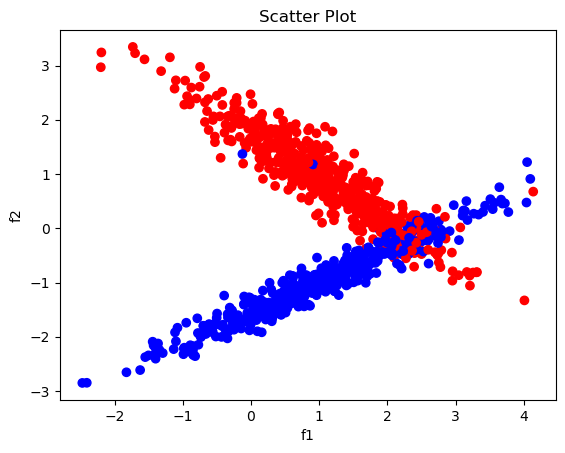

In [14]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'], cmap="bwr")
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Scatter Plot")
plt.show()


Before SMOTE: {np.int64(0): np.int64(894), np.int64(1): np.int64(106)}
After SMOTE: {np.int64(0): np.int64(670), np.int64(1): np.int64(670)}


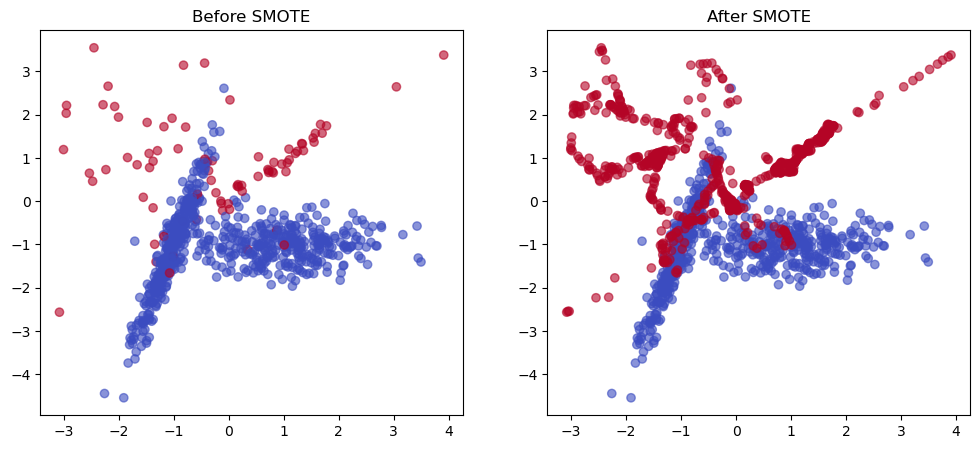

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Example dataset with 2 features (all informative, no redundant)
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_classes=2, weights=[0.9, 0.1], random_state=42)

print("Before SMOTE:", dict(zip(*np.unique(y, return_counts=True))))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", dict(zip(*np.unique(y_resampled, return_counts=True))))

# Convert to DataFrame
final_df = pd.DataFrame(X_resampled, columns=['f1', 'f2'])
final_df['target'] = y_resampled

# Scatter plot before vs after
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", alpha=0.6)
axes[0].set_title("Before SMOTE")

# After SMOTE
axes[1].scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap="coolwarm", alpha=0.6)
axes[1].set_title("After SMOTE")

plt.show()
